In [62]:
# Required module
import pandas as pd
import nasdaqdatalink as nddl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from scipy.stats import spearmanr
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")
nddl.ApiConfig.api_key = '-QVCnvjUyqV9eczABr4_'

<center><H1>Data Tabulation</H1></center>

<strong>Instructions</strong>: Run the following code blocks below to create the dataframes required for visualisation.

In [63]:
# Code strip for Interest Rates for Australia and United States
# Tabulation

# Read data from file
interest_rate_df = pd.read_csv('./Resources/Central_Bank_Rates.csv')

# Extract the date columns 
date_columns = interest_rate_df.columns[13:]

# Filter and select only the rows for the United States and Australia
filtered_interest_rates_df = interest_rate_df[interest_rate_df['Reference area'].isin(['United States', 'Australia'])]

# Create a new DataFrame with the filtered data
new_filtered_interest_rates_df = filtered_interest_rates_df.set_index('Reference area')
# Removed index name
new_filtered_interest_rates_df.rename_axis(index={'Reference area': None}, inplace=True)

# Transpose the DataFrame so that countries become rows and dates become columns
new_filtered_interest_rates_df = new_filtered_interest_rates_df[date_columns].transpose()

# Convert the index to datetime object
new_filtered_interest_rates_df.index = pd.to_datetime(new_filtered_interest_rates_df.index)
# Convert the datetime index to MM-YYYY format
new_filtered_interest_rates_df.index = new_filtered_interest_rates_df.index.strftime('%m-%Y')
# Filter the DataFrame for dates required
new_filtered_interest_rates_df = new_filtered_interest_rates_df['01-2010':'08-2023']
# Reverse the order of the DataFrame index in descending order
new_filtered_interest_rates_df = new_filtered_interest_rates_df.iloc[::-1]
#new_filtered_interest_rates_df.head()

In [64]:
# Code strip for Zillow Real Estate Data 
# Tabulation

# Date Filter
start_date = '01-2010'
end_date = '12-2023'

median_US_SRAM = nddl.get_table('ZILLOW/DATA', indicator_id='SRAM', region_id='102001', paginate = True)
median_US_SRAM['date'] = pd.to_datetime(median_US_SRAM['date'])
filtered_median_US_SRAM = median_US_SRAM[(median_US_SRAM['date'] >= start_date) & (median_US_SRAM['date'] <= end_date)]
filtered_median_US_SRAM = filtered_median_US_SRAM[['date', 'value']]
filtered_median_US_SRAM['date'] = pd.to_datetime(filtered_median_US_SRAM['date']).dt.strftime('%m-%Y')
filtered_median_US_SRAM = filtered_median_US_SRAM.rename(columns={'date': 'Date', 'value': 'Median Sale Price (Raw, All Homes, Monthly)'})
filtered_median_US_SRAM = filtered_median_US_SRAM.set_index('Date')
#filtered_median_US_SRAM.head()

In [65]:
# Code strip for BIS Real Property Price Index Information Summary
# Tabulation

# Read data from file
prop_price_summary_df  = pd.read_excel('./Resources/BIS_Det_Res_Prop_Price.xlsx', sheet_name='Summary Documentation')
filtered_prop_price_summary_US = prop_price_summary_df[(prop_price_summary_df['Code'] == 'Q:US:0:1:1:2:0:1') & (prop_price_summary_df['Country'] == 'United States')]
filtered_prop_price_summary_AU = prop_price_summary_df[(prop_price_summary_df['Code'] == 'Q:AU:2:1:0:1:6:0') & (prop_price_summary_df['Country'] == 'Australia')]

filtered_prop_price_summary_table_AU_US = {
    'Data': filtered_prop_price_summary_US.columns,
    'United States': filtered_prop_price_summary_US.values[0],
    'Australia': filtered_prop_price_summary_AU.values[0]
}

filtered_prop_price_summary_AU_US_df = pd.DataFrame(filtered_prop_price_summary_table_AU_US)
#pd.set_option('display.max_colwidth', None)
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.set_index('Data')
filtered_prop_price_summary_AU_US_df.rename_axis(index={'Data': None}, inplace=True)
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.style.set_properties(**{'text-align': 'left'})
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.set_table_styles([
    {'selector': 'th', 'props': 'text-align: left;'},
    {'selector': 'td', 'props': [('text-align', 'left'), ('width', '500px')]}  # Adjust '150px' as needed
])

#filtered_prop_price_summary_AU_US_df

In [66]:
# Read the Excel file into a DataFrame
monthly_rppi_au_df = pd.read_excel('./Resources/BIS_Det_Res_Prop_Price.xlsx', sheet_name='Monthly Series')

column_name = 'M:AU:0:1:0:1:6:0'
column_position = 3

start_row = 411
end_row = len(monthly_rppi_au_df)
# Extract the values from the specified column and rows
specific_column_data = monthly_rppi_au_df.iloc[start_row:end_row, column_position]
# Extract the corresponding dates from Column A
dates = monthly_rppi_au_df.iloc[start_row:end_row, 0]
# Convert the date strings to datetime objects
dates = pd.to_datetime(dates)
# Format the dates to display MM-YYYY
formatted_dates = dates.dt.strftime('%m-%Y')
# Create a new DataFrame with formatted dates and values
filter_monthly_rppi_au_df = pd.DataFrame({'Date': formatted_dates, column_name: specific_column_data})
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.dropna()
# Rename the column
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.rename(columns={'M:AU:0:1:0:1:6:0':'Value'})
# Set 'Date' as the index
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.set_index('Date')
#filter_monthly_rppi_au_df

In [67]:
# Code strip for BIS Real Property Price Index for US and AU

# Read data from file

# Read the CSV file and skip the first 7 rows
real_prop_price_US_AU_df = pd.read_csv('./Resources/BIS_AU_US.csv', skiprows=7)
real_prop_price_US_AU_df.head()

new_real_prop_price_US_AU_df = real_prop_price_US_AU_df.set_index('REF_AREA:Reference area')

new_real_prop_price_US_AU_df.rename_axis(index={'REF_AREA:Reference area': 'Date'}, inplace=True)

columns_to_drop = [
    'DATAFLOW_ID:Dataflow ID',
    'KEY:Timeseries Key',
    'FREQ:Frequency',
    'VALUE:Value',
    'UNIT_MEASURE:Unit',
    'TIME_PERIOD:Period'
]

new_real_prop_price_US_AU_df.drop(columns=columns_to_drop, inplace=True)
new_real_prop_price_US_AU_df = new_real_prop_price_US_AU_df.transpose()
new_real_prop_price_US_AU_df.index = pd.to_datetime(new_real_prop_price_US_AU_df.index, format='%Y-%m-%d')
new_real_prop_price_US_AU_df.rename(columns={'AU:Australia': 'Australia', 'US:United States': 'United States'}, inplace=True)
#new_real_prop_price_US_AU_df.head()

In [68]:
# Code for Crit-F

# Degrees of Freedom
Df_Model = 1  # Replace with the actual degrees of freedom for the model
Df_Residuals = 162  # Replace with the actual degrees of freedom for the residuals

# Significance Level (alpha)
alpha = 0.05  # Change this to your desired significance level

# Calculate the critical F-value
critical_f_value = stats.f.ppf(1 - alpha, Df_Model, Df_Residuals)

In [69]:
# Code for Regression Analysis

# Define your independent variable (interest rates)
X = new_filtered_interest_rates_df['United States']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Define your dependent variable (property prices)
y = filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the p-value for the coefficient of the interest rates
p_value_interest_rates = model.pvalues['United States']

# Set your significance level (e.g., 0.05)
alpha = 0.05

<center><H1>Data Visualization</H1></center>

<strong>Instructions</strong>: Run the following code blocks below to create the PNG files required for visualisation and analysis.

In [70]:
# Convert the index of new_filtered_interest_rates_df to datetime if it's not already in that format
new_filtered_interest_rates_df.index = pd.to_datetime(new_filtered_interest_rates_df.index, format='%m-%Y')

# Create a figure and the first subplot (property prices)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot property prices on the first subplot
ax1.plot(new_real_prop_price_US_AU_df.index, new_real_prop_price_US_AU_df['United States'], label='United States Property Prices', color='blue', linewidth=1)
ax1.plot(new_real_prop_price_US_AU_df.index, new_real_prop_price_US_AU_df['Australia'], label='Australia Property Prices', color='green', linewidth=1)
ax1.set_xlabel('Years')
ax1.set_ylabel('Property Prices', color='black')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a second subplot with the same X-axis
ax2 = ax1.twinx()

# Plot interest rates on the second subplot
ax2.plot(new_filtered_interest_rates_df.index, new_filtered_interest_rates_df['Australia'], label='RBA Interest Rates', color='red', linestyle = '--', linewidth=2)
ax2.plot(new_filtered_interest_rates_df.index, new_filtered_interest_rates_df['United States'], label='Federal Reserve Interest Rates', color='orange', linestyle = '--', linewidth=2)
ax2.set_ylabel('Interest Rates', color='black')
ax2.legend(loc='upper center')

# Show the combined plot
plt.title('United States and Australian BIS Real Property Price Index \n vs \n Central Bank Interest Rates')
plt.tight_layout()
#plt.show()
plt.savefig('US_AU_BIS_RPPI.png')
plt.close()

In [71]:
# Convert the index to datetime with the specified format
filtered_median_US_SRAM.index = pd.to_datetime(filtered_median_US_SRAM.index, format='%m-%Y')

# Plot
plt.plot(filtered_median_US_SRAM.index, filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)'], label = 'Median Sale Price', color = 'green')
plt.title('Long-term Median Sale Price (Raw, All Homes, Monthly 2010-2023)')
plt.xlabel('Years')
plt.ylabel('Median Sale Price')

# Use dateformatter to display only the years on the X-Axis
date_format = mdates.DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))

# Rotate the x-labels for readability
plt.xticks(rotation='vertical')

# Add legend
plt.legend()
plt.tight_layout()
#plt.show
plt.savefig('Zillow_Median_Long.png')
plt.close()

In [72]:
# Covid Period
start_date = '01-2020'
end_date = '12-2023'

alt_median_US_SRAM = nddl.get_table('ZILLOW/DATA', indicator_id='SRAM', region_id='102001', paginate = True)
alt_median_US_SRAM['date'] = pd.to_datetime(alt_median_US_SRAM['date'])
alt_filtered_median_US_SRAM = alt_median_US_SRAM[(alt_median_US_SRAM['date'] >= start_date) & (alt_median_US_SRAM['date'] <= end_date)]
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM[['date', 'value']]
alt_filtered_median_US_SRAM['date'] = pd.to_datetime(alt_filtered_median_US_SRAM['date']).dt.strftime('%m-%Y')
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM.rename(columns={'date': 'Date', 'value': 'Median Sale Price (Raw, All Homes, Monthly)'})
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM.set_index('Date')
alt_filtered_median_US_SRAM

# Visualisation


alt_filtered_median_US_SRAM.index = pd.to_datetime(alt_filtered_median_US_SRAM.index, format='%m-%Y')

plt.figure(figsize=(12, 6)) 
ax = plt.gca()

plt.plot(alt_filtered_median_US_SRAM.index, alt_filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)'], label = 'Median Sale Price', color = 'green')
plt.title('Zillow Median Sale Price (Raw, All Homes, Monthly 2020-2023)')
plt.xlabel('Years')
plt.ylabel('Median Sale Price')

# Use dateformatter to display only the years on the X-Axis
date_format = mdates.DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major locator to display months

# Rotate the x-labels for readability
plt.xticks(rotation='vertical')

# Add legend
plt.legend()

# Add annotation at the specified date '02-2020'
annotation_date_1 = pd.to_datetime('02-2020', format='%m-%Y')
annotation_value_1 = alt_filtered_median_US_SRAM.loc['02-2020', 'Median Sale Price (Raw, All Homes, Monthly)']




# Modify the annotation text for the first annotation to display in two lines
annotation_text_1 = 'US Declares Public \nHealth Emergency(02-2020)'

ax.annotate(annotation_text_1,
            xy=(annotation_date_1, annotation_value_1), xycoords='data',
            xytext=(150, 250), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='bottom')

# Add a second annotation at '03-2020' with a different text and adjusted xytext
annotation_date_2 = pd.to_datetime('03-2020', format='%m-%Y')
annotation_value_2 = alt_filtered_median_US_SRAM.loc['03-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

# Modify the annotation text for the second annotation
annotation_text_2 = 'Fed Rate Cuts Start\n March 6, 2020: Stimulus and Relief Package 1 (Phase One)\n March 18, 2020: Stimulus and Relief Package 2 (FFCRA)\n  March 27, 2020: Stimulus and Relief Package 3: CARES Act'

ax.annotate(annotation_text_2,
            xy=(annotation_date_2, annotation_value_2), xycoords='data',
            xytext=(220, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


annotation_text_3 = 'April 24, 2020: Stimulus and Relief Package 3.5'
annotation_date_3 = pd.to_datetime('04-2020', format='%m-%Y')
annotation_value_3 = alt_filtered_median_US_SRAM.loc['04-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_3,
            xy=(annotation_date_3, annotation_value_3), xycoords='data',
            xytext=(150, 210), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')

annotation_text_4 = 'Dec. 21, 2020: Consolidated Appropriations Act'
annotation_date_4 = pd.to_datetime('12-2020', format='%m-%Y')
annotation_value_4 = alt_filtered_median_US_SRAM.loc['12-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_4,
            xy=(annotation_date_4, annotation_value_4), xycoords='data',
            xytext=(150, 125), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')



annotation_text_5 = 'March 11, 2021: American Rescue Plan Act of 2021'
annotation_date_5 = pd.to_datetime('03-2021', format='%m-%Y')
annotation_value_5 = alt_filtered_median_US_SRAM.loc['03-2021', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_5,
            xy=(annotation_date_5, annotation_value_5), xycoords='data',
            xytext=(150, -70), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


annotation_text_6 = 'March 17, 2022: Fed Rates Hike Started'
annotation_date_6 = pd.to_datetime('03-2022', format='%m-%Y')
annotation_value_6 = alt_filtered_median_US_SRAM.loc['03-2022', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_6,
            xy=(annotation_date_6, annotation_value_6), xycoords='data',
            xytext=(150, -150), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


plt.tight_layout()
#plt.show
plt.savefig('Zillow_Median_Short.png')
plt.close()

<center><H1>Analysis</H1></center>

The following code blocks will present the visualisation created using dataframes. This is followed by an interpretation and analysis of data.

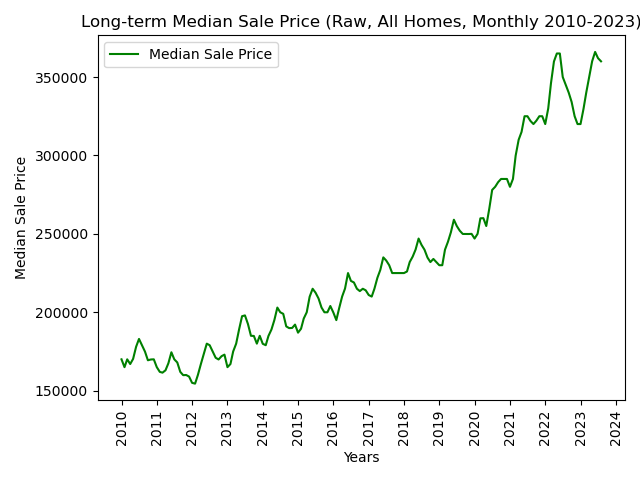

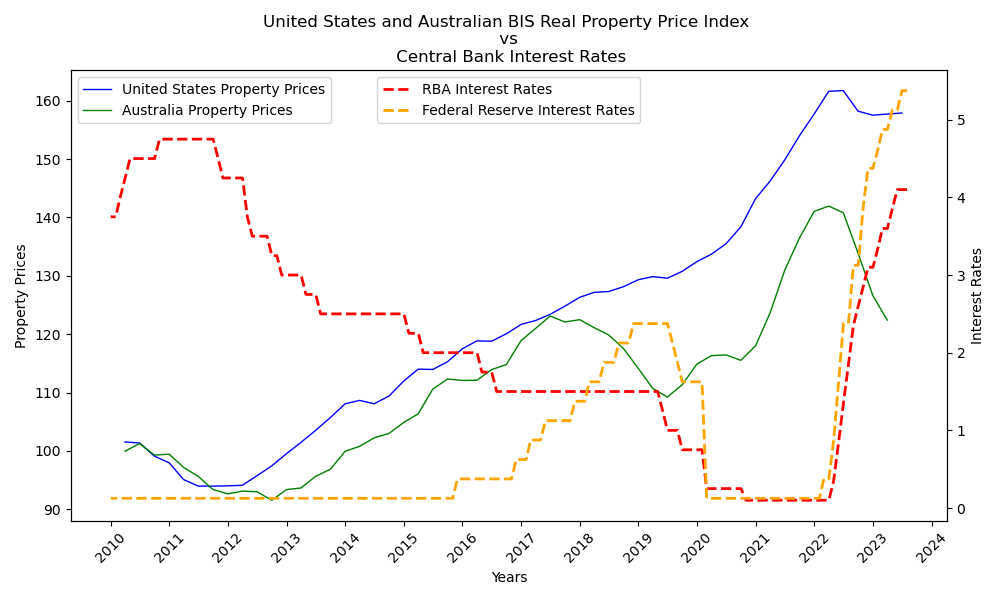

In [73]:
display(Image(filename='Zillow_Median_Long.png'))
display(Image(filename='US_AU_BIS_RPPI.png'))

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
        ol {
            margin-left: 20px;
        }
    </style>
</head>
<body>
    <h1>Long-term Median Sale Price</h1>
    <p>When examining the trends in the Median Sale Price using Zillow's SRAM indicator, a notable pattern emerges. Between 2010 and 2012, the median sale price in the United States displayed a declining trajectory. However, from 2012 onward, there was a distinct shift towards a sustained upward trend. It's important to emphasize that this upward trajectory was not without interruptions; it featured periodic fluctuations with instances of both decline and recovery. The same trend can be observed when using the BIS Real Property Price Index for the U.S real estate market</p>
    <p>Several key insights deserve our attention:</p>
    <ol>
        <li>
            The U.S. housing market was in the process of recovery from the global financial crisis of 2008 and the subsequent housing market crash. As economic conditions improved, consumer confidence surged, spurring greater demand for residential properties.
        </li>
        <li>
            The stabilization of the economy bolstered consumer confidence. As individuals grew more secure in their financial situations and job prospects, a noticeable uptick in housing market participation was observed.
        </li>
        <li>
            Real estate investors, including institutional entities, emerged as prominent actors in the market, significantly increasing their property acquisitions. This heightened investor activity amplified demand and intensified competition within the housing sector.
        </li>
        <li>
            A distinct dip in median property prices became evident in the middle of 2022, aligning with the Federal Reserve's decision to raise interest rates.
        </li>
    </ol>
    <p>Despite these fluctuations, an overall trend emerges, characterized by a consistent long-term growth in median sale prices.</p>
</body>
</html>

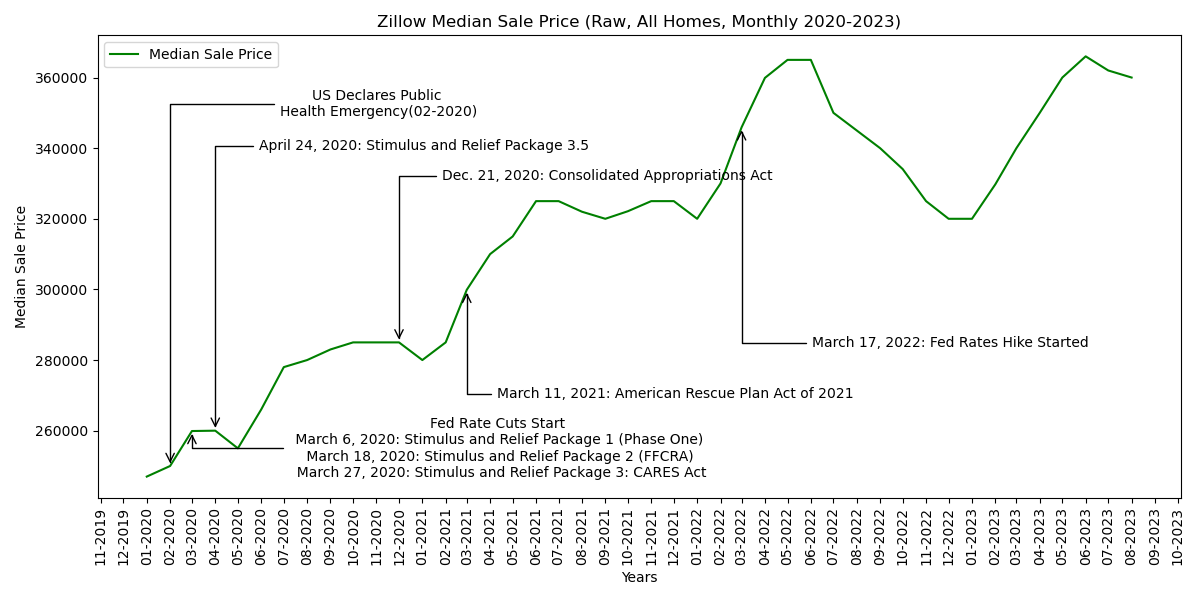

In [74]:
display(Image(filename='Zillow_Median_Short.png'))

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>
<body>
    <h1>Median Sale Price during the Pandemic and the Rise of Interest Rates</h1>
    <p><strong>Economic Stimulus and Pandemic Impact (March 2020 - May 2020):</strong> Median house prices plateaued, reflecting the uncertainty and economic challenges posed by the pandemic, as well as the declaration of a U.S. public health emergency. Buyers and sellers were cautious due to these unprecedented circumstances.</p>
    <p>In May 2020, there was a notable change in the trend, as median house prices began to increase. The pandemic brought demands for more space, particularly from young urban households whose family formation moves were greatly accelerated in the wake of the pandemic.</p>
    <p><strong>Plateau and Affordability Concerns (June 2021 - February 2022):</strong> The plateauing of prices around June 2021 might have been influenced by factors such as affordability concerns and housing market fatigue, especially in markets that had experienced rapid price growth.</p>
    <p><strong>Resurgence and Interest Rate Hikes (February 2022 - January 2023):</strong> In February 2022, the housing market started to increase again. The anticipation of rising rates might have motivated buyers to enter the market before borrowing costs became more expensive.</p>
    <p>The market peaked in June 2022, driven by a combination of factors, including low inventory, strong demand, and increased interest rates.</p>
    <p><strong>Decline and Recovery (June 2022 - January 2023):</strong> After the peak, there was a period of declining prices, which extended until January 2023. This decline could be attributed to affordability issues, as rising prices and interest rates made it more challenging for some buyers.</p>
    <p><strong>Recent Resurgence (January 2023 - June 2023):</strong> From January 2023, there was another upswing in median house prices, ultimately reaching the same peak as in June 2022 by June 2023. This resurgence could be attributed to various factors, including improved economic conditions, continued demand for housing, and potential adjustments in the housing market.</p>
</body>
</html>

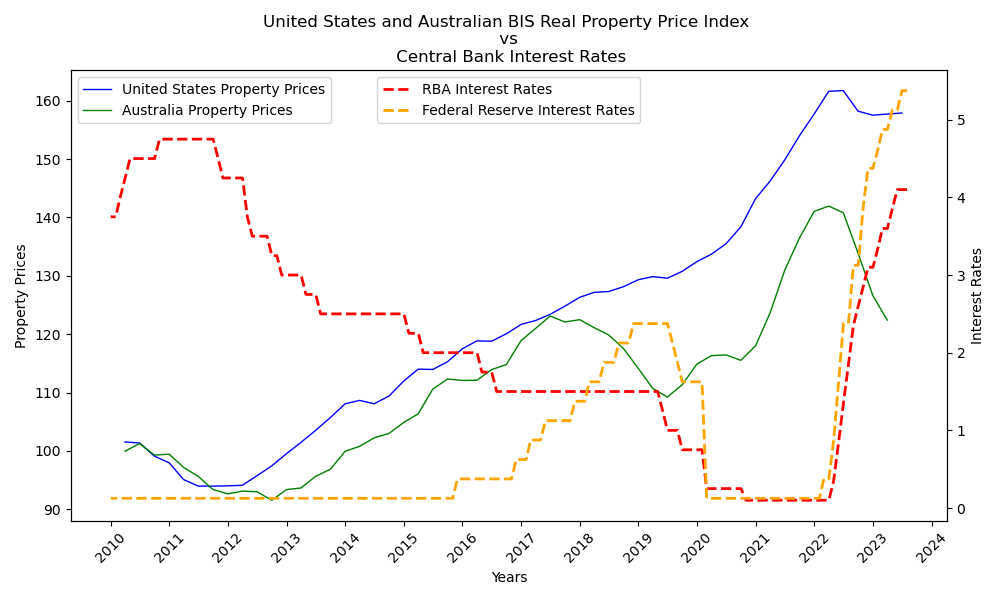

In [75]:
display(Image(filename='US_AU_BIS_RPPI.png'))

<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }

        h1 {
            text-align: center;
        }

        h2 {
            font-size: 24px;
        }

        h3 {
            font-size: 20px;
        }

        p {
            margin: 15px 0;
        }

        ul {
            list-style-type: disc;
            margin-left: 20px;
        }
    </style>
</head>

<body>
    <h1>The Dataset</h1>
    <p>The dataset includes two key components: the BIS Real Property Price Index for Australia and the United States and interest rates for both countries.</p>

    <h2>United States</h2>
    <p>The interest rates in the United States have been relatively higher than in Australia over the entire period, with a range from 0.125% to 5.375%. The Real Property Price Index for the United States has generally increased over the years, although it saw some fluctuations. It started around 101 in 2010 and reached approximately 157 in 06-2023. In index terms, it would mean that the same property around 2010 is now 50% more in value.</p>

    <h3>Correlation Analysis</h3>
    <p>To analyze the relationship between house prices and interest rates in the United States, you would typically perform a correlation analysis. This involves calculating the correlation coefficient between the Real Property Price Index and interest rates. The coefficient can help determine the strength and direction of the relationship:</p>
    <ul>
        <li>If the coefficient is positive, it suggests that as interest rates rise, property prices tend to increase. This is because higher interest rates can signal a strong economy, leading to increased demand for real estate.</li>
        <li>If the coefficient is negative, it suggests that as interest rates rise, property prices tend to decrease. This is because higher interest rates can increase the cost of borrowing and reduce housing demand.</li>
        <li>If the coefficient is close to zero, there may be no significant relationship between interest rates and property prices.</li>
    </ul>

    <h2>Australia</h2>
    <p>The interest rates in Australia also saw variation during the period but remained generally lower than in the United States, with a range from 0.125% to 4.10%. The Real Property Price Index in Australia increased over the years, indicating a general upward trend in property prices. It started around 99 in 2010 and reached approximately 122 in 03-2023. In index terms, it would mean that the same property around 2010 is now 22% more in value.</p>

    <h3>Correlation Analysis</h3>
    <p>To analyze the relationship between house prices and interest rates in Australia, you would typically perform a correlation analysis. This involves calculating the correlation coefficient between the Real Property Price Index and interest rates. The coefficient can help determine the strength and direction of the relationship:</p>
    <ul>
        <li>If the coefficient is positive, it suggests that as interest rates rise, property prices tend to increase. This is because higher interest rates can signal a strong economy, leading to increased demand for real estate.</li>
        <li>If the coefficient is negative, it suggests that as interest rates rise, property prices tend to decrease. This is because higher interest rates can increase the cost of borrowing and reduce housing demand.</li>
        <li>If the coefficient is close to zero, there may be no significant relationship between interest rates and property prices.</li>
    </ul>
</body>

</html>


In [86]:
# Null and Alt Hypotheses
print("Null Hypothesis (H0):")
print("There is no statistically significant relationship between changes in interest rates and property prices in the United States.\n")
print("Alternative Hypothesis (H1):")
print("There is a statistically significant relationship between changes in interest rates and property prices in the United States.\n")
print(f"P-value for the 'interest rate' coefficient: {p_value_interest_rates}")
print(f"Critical F-value at alpha = {alpha}: {critical_f_value}")

print('\nF-statistic: 85.42 is much larger than Critical F-value: 3.8995, it indicates that the model is statistically significant at the 0.05 significance level.') 
print('\nThis suggests that interest rates has a statistically significant effect on the property prices. This is a strong indication that the regression model is meaningful and that the independent variables collectively explain a significant portion of the variation in property prices.')

# Hypothesis testing based on p-value
if p_value_interest_rates < alpha:
    print("\nReject the null hypothesis. Interest rates have a statistically significant effect on property prices.\n")
else:
    print("\nFail to reject the null hypothesis. Interest rates do not have a statistically significant effect on property prices.\n")
print(model.summary())
print("[2] See below statiscal reference for more information on the OLS Regression Results.")

Null Hypothesis (H0):
There is no statistically significant relationship between changes in interest rates and property prices in the United States.

Alternative Hypothesis (H1):
There is a statistically significant relationship between changes in interest rates and property prices in the United States.

P-value for the 'interest rate' coefficient: 1.3320868257407982e-16
Critical F-value at alpha = 0.05: 3.899502435176602

F-statistic: 85.42 is much larger than Critical F-value: 3.8995, it indicates that the model is statistically significant at the 0.05 significance level.

This suggests that interest rates has a statistically significant effect on the property prices. This is a strong indication that the regression model is meaningful and that the independent variables collectively explain a significant portion of the variation in property prices.

Reject the null hypothesis. Interest rates have a statistically significant effect on property prices.

                                 

In summary, the regression results indicate that United States interest rates are statistically significant in explaining variations in property prices, as the p-value associated with the "United States" interest rates coefficient is very close to zero. However, the low R-squared value suggests that while interest rates play a role, they don't explain the entirety of the variation in property prices, and other factors likely contribute as well. The low Durbin-Watson statistic raises concerns about potential autocorrelation in the model's residuals, which may need further investigation or correction.

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>
<body>
    <h1>BIS Real Property Price Index for Australia and the United States and Interest Rates for both countries</h1>
    <h2><strong>United States</strong></h2>
    <p>The interest rates in the United States have been relatively higher than in Australia over the entire period, with a range from 0.125% to 5.375%. The Real Property Price Index for the United States has generally increased over the years, although it saw some fluctuations. It started around 101 in 2010 and reached approximately 157 in 06-2023. In index terms, it would mean that the same property around 2010 is now 50% more in value. Furthermore, Zillows SRAM indicator which measures the Median Sale Price (Raw, All Homes, Monthly) supports this observations wherein the price from 2010 has almost doubled in 2023.</p>
    <h2><strong>Australia</strong></h2>
    <p>The interest rates in Australia also saw variation during the period but remained generally lower than in the United States, with a range from 0.125% to 4.10%. The Real Property Price Index in Australia increased over the years, indicating a general upward trend in property prices. It started around 99 in 2010 and reached approximately 122 in 03-2023. In index terms, it would mean that the same property around 2010 is now 22% more in value.</p>

</body>
</html>

<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h2 {
            font-size: 24px;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>

<body>
    <h2>Conclusion</h2>
    <p>The United States generally maintained its housing market price uptrend compared to Australia may be due to the following conditions:</p>
    <ul>
        <li>Strong economic conditions often lead to higher property prices as people have more disposable income and are more likely to invest in real estate.</li>
        <li>Central banks, like the Federal Reserve in the United States and the Reserve Bank of Australia, influence interest rates as a tool to manage inflation and economic growth. Changes in interest rates can affect borrowing costs and property demand.</li>
        <li>In the United States, 30-year fixed-rate mortgages are common, providing borrowers with long-term rate stability and smaller monthly payments. In Australia, it's more common to have shorter fixed-rate terms. This difference can affect the sensitivity of the housing market to changes in interest rates.</li>
        <li>Longer-term fixed-rate loans in the U.S. may make homeowners less sensitive to short-term interest rate fluctuations, which can dampen the immediate impact of interest rate changes on property prices.</li>
        <li>In Australia, where fixed-rate terms are shorter, property prices might respond more quickly to changes in interest rates, as borrowers are exposed to interest rate adjustments more frequently.</li>
        <li>The availability of assumable loans in the U.S. can influence the housing market. An assumable loan allows a buyer to take over the seller's existing mortgage at its original terms. This can make homes more attractive to buyers and potentially support property values.</li>
    </ul>
</body>

</html>

The regression results show the output of an Ordinary Least Squares (OLS) regression model. This model examines the relationship between interest rates in the United States and property prices.

Here's an interpretation of the key elements of the regression results:

1. **R-squared (R²)**: 
    - R-squared measures the goodness of fit of the model, representing the proportion of the variance in the dependent variable (property prices) that can be explained by the independent variable (interest rates). An R-squared value of 0.345 indicates that approximately 34.5% of the variation in property prices can be explained by changes in interest rates. This suggests that interest rates have some influence on property prices, but there are other factors at play as well.

2. **F-statistic**: 
    - The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 85.42, and the associated p-value is very close to zero (1.33e-16). This low p-value indicates that the model as a whole is statistically significant, implying that at least one of the independent variables (interest rates) has a significant impact on the dependent variable (property prices).

3. **Coefficients**:
   - The coefficient of the "const" term is approximately 2.07e+05. This represents the estimated property price when the United States interest rate is zero. In practical terms, it's the intercept of the regression line.
   - The coefficient for "United States" interest rates is approximately 2.758e+04. This suggests that for each unit increase in United States interest rates, property prices are estimated to increase by approximately 27,580 units.

4. **P-values**:
   - The p-value associated with the "United States" interest rates coefficient is very close to zero, indicating that the interest rates variable is statistically significant. This supports the Alternative Hypothesis (H1) that interest rates have a statistically significant effect on property prices.

5. **Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis**:
   - These statistics are used to assess the assumptions of the regression model. An important point to note is the very low Durbin-Watson statistic (close to zero), which suggests potential issues with autocorrelation in the residuals, meaning that the errors may not be independent over time. This could affect the reliability of the model.

6. **Notes**:
   - The standard errors assume that the covariance matrix of the errors is correctly specified. This is an assumption of the OLS model.